<a href="https://colab.research.google.com/github/JoyKarmoker/Python-Codes-ML/blob/master/Detecting_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

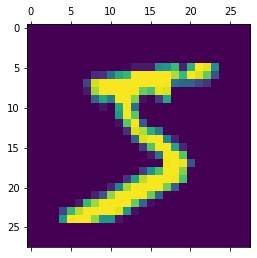

In [7]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

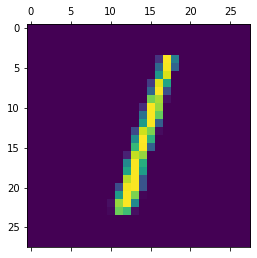

In [9]:
plt.matshow(X_test[2])

In [ ]:
y_test[2]

1

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train/255;
X_test = X_test/255;

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
len(X_train)

60000

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4629 - accuracy: 0.8424
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0730 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8278 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5796 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3574 - accuracy: 0.8865


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.7081 - accuracy: 0.8916


[5.708083629608154, 0.8916000127792358]

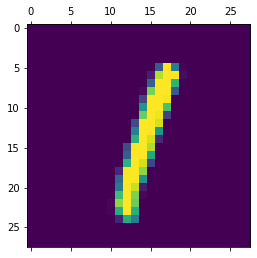

In [26]:
plt.matshow(X_test[5])

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[5]

array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       3.5442811e-22, 9.5724049e-15, 1.1955562e-23, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [28]:
np.argmax(y_predicted[5])

1

In [29]:
y_predicted_labels = [np.argmax(i)  for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    1,    2,    0,    0,    0,    0,    0],
       [  11, 1122,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 153,  297,  565,    1,   14,    0,    2,    0,    0,    0],
       [ 213,  317,  348,  131,    0,    0,    0,    1,    0,    0],
       [  41,   79,   68,  104,  690,    0,    0,    0,    0,    0],
       [ 347,   58,  121,  167,   64,  133,    2,    0,    0,    0],
       [ 170,   28,  628,   30,   58,   23,   21,    0,    0,    0],
       [  88,   80,  216,  564,   57,   15,    0,    8,    0,    0],
       [ 118,  269,  373,   79,   78,   52,    3,    0,    2,    0],
       [  52,   73,   42,  428,  408,    1,    0,    5,    0,    0]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

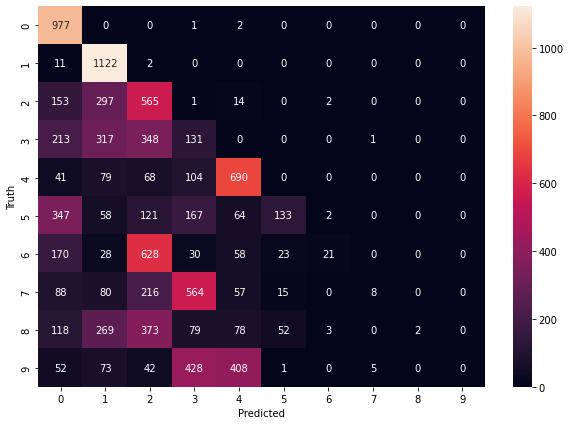

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
mode = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2302 - accuracy: 0.8913
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0719 - accuracy: 0.8935
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2159 - accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1607 - accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2238 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.9630 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0919 - accuracy: 0.8930
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0360 - accuracy: 0.8924
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1524 - accuracy: 0.8935
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.137

In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.6398 - accuracy: 0.8902


[5.639750003814697, 0.8902000188827515]

In [43]:
mode = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0930 - accuracy: 0.8946
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0835 - accuracy: 0.8948
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0941 - accuracy: 0.8946
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.0544 - accuracy: 0.8942
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1761 - accuracy: 0.8948
